In [1]:
import pandas as pd

import matplotlib.pyplot as plt

---
### Downloaded Sample from eBird to see what the file looked like

In [7]:
file_path1 = '../data/eBird_Sample/ebd_US-AL-101_201801_201801_relMay-2018.txt'

df1 = pd.read_csv(file_path1, sep='\t')

df1.columns

Index(['GLOBAL UNIQUE IDENTIFIER', 'LAST EDITED DATE', 'TAXONOMIC ORDER',
       'CATEGORY', 'COMMON NAME', 'SCIENTIFIC NAME', 'SUBSPECIES COMMON NAME',
       'SUBSPECIES SCIENTIFIC NAME', 'OBSERVATION COUNT',
       'BREEDING BIRD ATLAS CODE', 'BREEDING BIRD ATLAS CATEGORY', 'AGE/SEX',
       'COUNTRY', 'COUNTRY CODE', 'STATE', 'STATE CODE', 'COUNTY',
       'COUNTY CODE', 'IBA CODE', 'BCR CODE', 'USFWS CODE', 'ATLAS BLOCK',
       'LOCALITY', 'LOCALITY ID', 'LOCALITY TYPE', 'LATITUDE', 'LONGITUDE',
       'OBSERVATION DATE', 'TIME OBSERVATIONS STARTED', 'OBSERVER ID',
       'SAMPLING EVENT IDENTIFIER', 'PROTOCOL TYPE', 'PROTOCOL CODE',
       'PROJECT CODE', 'DURATION MINUTES', 'EFFORT DISTANCE KM',
       'EFFORT AREA HA', 'NUMBER OBSERVERS', 'ALL SPECIES REPORTED',
       'GROUP IDENTIFIER', 'HAS MEDIA', 'APPROVED', 'REVIEWED', 'REASON',
       'TRIP COMMENTS', 'SPECIES COMMENTS', 'Unnamed: 46'],
      dtype='object')

In [6]:
# What's in column 46? Nothing.

df['Unnamed: 46'].unique()

array([nan])

---
### New dataset, American Crow in TN from May 2010 to May 2020

In [2]:
file_path2 = '../data/tn_crow_2010/ebd_US-TN_amecro_201005_202005_relApr-2020.txt'

df2 = pd.read_csv(file_path2, sep = '\t', low_memory = False)

df2.columns

Index(['GLOBAL UNIQUE IDENTIFIER', 'LAST EDITED DATE', 'TAXONOMIC ORDER',
       'CATEGORY', 'COMMON NAME', 'SCIENTIFIC NAME', 'SUBSPECIES COMMON NAME',
       'SUBSPECIES SCIENTIFIC NAME', 'OBSERVATION COUNT',
       'BREEDING BIRD ATLAS CODE', 'BREEDING BIRD ATLAS CATEGORY', 'AGE/SEX',
       'COUNTRY', 'COUNTRY CODE', 'STATE', 'STATE CODE', 'COUNTY',
       'COUNTY CODE', 'IBA CODE', 'BCR CODE', 'USFWS CODE', 'ATLAS BLOCK',
       'LOCALITY', 'LOCALITY ID', 'LOCALITY TYPE', 'LATITUDE', 'LONGITUDE',
       'OBSERVATION DATE', 'TIME OBSERVATIONS STARTED', 'OBSERVER ID',
       'SAMPLING EVENT IDENTIFIER', 'PROTOCOL TYPE', 'PROTOCOL CODE',
       'PROJECT CODE', 'DURATION MINUTES', 'EFFORT DISTANCE KM',
       'EFFORT AREA HA', 'NUMBER OBSERVERS', 'ALL SPECIES REPORTED',
       'GROUP IDENTIFIER', 'HAS MEDIA', 'APPROVED', 'REVIEWED', 'REASON',
       'TRIP COMMENTS', 'SPECIES COMMENTS', 'Unnamed: 46'],
      dtype='object')

In [3]:
# Narrowing to columns of interest

columns_of_interest = ['COMMON NAME', 
                       'SCIENTIFIC NAME',
                       'OBSERVATION COUNT',
                       'LATITUDE',
                       'LONGITUDE',
                       'OBSERVATION DATE']

df2 = pd.read_csv(file_path2, sep = '\t', usecols = columns_of_interest)

df2.head()

,COMMON NAME,SCIENTIFIC NAME,OBSERVATION COUNT,LATITUDE,LONGITUDE,OBSERVATION DATE
0,American Crow,Corvus brachyrhynchos,4,36.216370,-84.287970,2010-06-07
1,American Crow,Corvus brachyrhynchos,2,35.168544,-89.062780,2010-06-06
2,American Crow,Corvus brachyrhynchos,1,36.160330,-82.396431,2010-08-15
3,American Crow,Corvus brachyrhynchos,1,35.640418,-83.689728,2010-08-11
4,American Crow,Corvus brachyrhynchos,X,35.631349,-83.445711,2010-06-21


In [4]:
# What percentage of rows would I lose if I drop the 'X' from Observation Count?

len(df2[df2['OBSERVATION COUNT'] == 'X'].index)/len(df2)*100

2.322034789620376

In [5]:
# Removing 'X' in observation count so that observation count can be converted to int for mathematical operations

df2 = df2.loc[df2['OBSERVATION COUNT'] != 'X']

In [6]:
df2.to_csv('../data/tn_crow_2010/parsed_data.csv')

In [7]:
# Double checking a value in PowerBI. Looks good.

df2.loc[(df2['OBSERVATION DATE'] >= '2019-11-01') &  (df2['OBSERVATION DATE'] <= '2019-11-30')]['OBSERVATION COUNT'].astype(int).sum()

21476

#### Quick analysis in PowerBI shows that mapping sightings over time using dates, observation count sums, and lat/lng is possible. Using line graphs of months, labels years, values sum of observation counts show that as years increase the number of sightings increases (more birders/birder efforts?). Downloading a new dataset of all TN sightings to get relative frequency of species.

---
### Downloaded a new dataset from eBird. All birds in TN from Jan 2010 to Jan 2020

In [8]:
file_path3 = '../data/tn_all_2010/ebd_US-TN_201001_202001_relApr-2020.txt'

columns_of_interest = ['COMMON NAME', 
                       'SCIENTIFIC NAME',
                       'OBSERVATION COUNT',
                       'LATITUDE',
                       'LONGITUDE',
                       'OBSERVATION DATE']

df3 = pd.read_csv(file_path3, sep = '\t', usecols = columns_of_interest)

df3.head()

,COMMON NAME,SCIENTIFIC NAME,OBSERVATION COUNT,LATITUDE,LONGITUDE,OBSERVATION DATE
0,woodpecker sp.,Picidae sp.,1,36.133473,-82.275538,2010-10-09
1,Red-eyed Vireo,Vireo olivaceus,1,35.309137,-84.039316,2010-09-02
2,Vesper Sparrow,Pooecetes gramineus,1,35.762811,-85.666409,2010-01-17
3,Worm-eating Warbler,Helmitheros vermivorum,3,36.273015,-86.905004,2010-05-24
4,Tree Swallow,Tachycineta bicolor,4,36.175372,-86.708865,2010-04-04


In [9]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5221968 entries, 0 to 5221967
Data columns (total 6 columns):
 #   Column             Dtype  
---  ------             -----  
 0   COMMON NAME        object 
 1   SCIENTIFIC NAME    object 
 2   OBSERVATION COUNT  object 
 3   LATITUDE           float64
 4   LONGITUDE          float64
 5   OBSERVATION DATE   object 
dtypes: float64(2), object(4)
memory usage: 239.0+ MB


In [10]:
# Percentage of 'X' observations?

len(df3[df3['OBSERVATION COUNT'] == 'X'].index)/len(df3)*100

2.3278197032229992

In [11]:
# Removing 'X' in observation count and converting observation count to int for mathematical operations

df3 = df3.loc[df3['OBSERVATION COUNT'] != 'X']

df3['OBSERVATION COUNT'] = df3['OBSERVATION COUNT'].astype(int)

In [12]:
# How many different birds in TN in my dataset?

len(df3['COMMON NAME'].unique())

534

In [13]:
# Getting the relative frequency of crows for Jun 2010

june_2010 = df3.loc[(df3['OBSERVATION DATE'] >= '2010-06-01') & (df3['OBSERVATION DATE'] <= '2010-06-30')]

crow_count = june_2010.loc[june_2010['COMMON NAME'] == 'American Crow']['OBSERVATION COUNT'].sum()

all_count = june_2010['OBSERVATION COUNT'].sum()

crow_count/all_count*100

2.8624656982452605

In [14]:
# Creating a function to get the relative frequency of crows when passed a pair of dates.

def get_bird_pct(bird, date1, date2):
    """Takes 2 dates finds the percentage of crows in TN between those dates"""
    date_frame = df3.loc[(df3['OBSERVATION DATE'] >= date1) & (df3['OBSERVATION DATE'] < date2)]
    
    bird_count = date_frame.loc[date_frame['COMMON NAME'] == bird]['OBSERVATION COUNT'].sum()
    
    all_count = date_frame['OBSERVATION COUNT'].sum()
    
    global bird_pct
    
    bird_pct = round(bird_count/all_count*100, 2)
         
    return bird_pct

In [15]:
# Making a list of dates that match the months in my dataset.

dates = pd.date_range('2010-01-01','2020-03-01' , freq='1M')-pd.offsets.MonthBegin(1)

dates

DatetimeIndex(['2010-01-01', '2010-02-01', '2010-03-01', '2010-04-01',
               '2010-05-01', '2010-06-01', '2010-07-01', '2010-08-01',
               '2010-09-01', '2010-10-01',
               ...
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01'],
              dtype='datetime64[ns]', length=122, freq='M')

In [16]:
df3['COMMON NAME'].sort_values().unique()

array(['Acadian Flycatcher', 'Accipiter sp.', 'Alder Flycatcher',
       "Alder/Willow Flycatcher (Traill's Flycatcher)",
       "Allen's Hummingbird", 'American Avocet', 'American Bittern',
       'American Black Duck', 'American Black/Mottled Duck',
       'American Coot', 'American Crow', 'American Flamingo',
       'American Golden-Plover', 'American Goldfinch', 'American Kestrel',
       'American Pipit', 'American Redstart', 'American Robin',
       'American Tree Sparrow', 'American White Pelican',
       'American Wigeon', 'American Wigeon x Mallard (hybrid)',
       'American Woodcock', 'Ammospiza sp.', 'Anhinga', 'Arctic Tern',
       'Arctic/Pacific Loon', 'Ash-throated Flycatcher', 'Aythya sp.',
       "Bachman's Sparrow", "Baird's Sandpiper", 'Bald Eagle',
       'Baltimore Oriole', 'Bank Swallow', 'Barn Owl', 'Barn Swallow',
       'Barred Owl', "Barrow's Goldeneye", 'Bay-breasted Warbler',
       'Bay-breasted/Blackpoll Warbler', "Bell's Vireo",
       'Belted Kingfisher

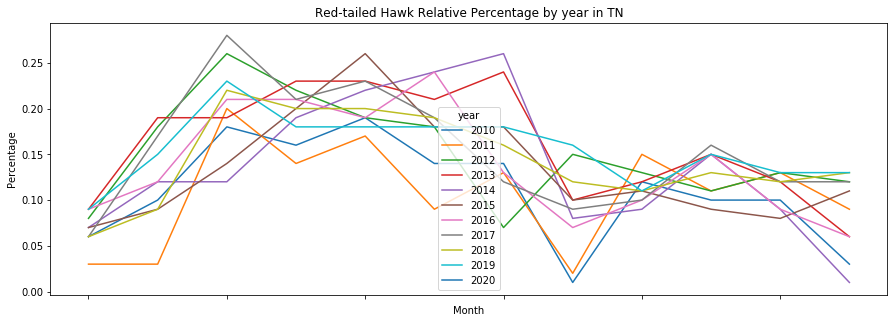

In [68]:
# Generating a graph of relative frequency of bird by month and year

bird = 'Red-tailed Hawk'

data_list = []

for i in range(len(dates)):
    if i+1 == len(dates):
        break
    else:
    
        get_bird_pct(bird, dates[i].date().strftime('%Y-%m-%d'), dates[i+1].date().strftime('%Y-%m-%d'))
        data_list.append([dates[i].date().strftime('%Y-%m-%d'), bird_pct])
                
df = pd.DataFrame(data_list)

df.columns = ['date', f'{bird} pct']

df['month'] = df['date'].str.split('-').str[1]

df['year'] = df['date'].str.split('-').str[0]

df['year'] = df['year'].astype(int)

df['month'] = df['month'].astype('category')

df_pivot = df.pivot(index = 'month', columns = 'year', values = f'{bird} pct')

df_pivot.plot(figsize = (15, 5))

plt.xlabel('Month')
plt.ylabel('Percentage')
plt.title(f'{bird} Relative Percentage by year in TN')

plt.show()

#### Birds with interesting graphs:

Chimney Swift


#### Birds with middling graphs:

Eastern Bluebird

American Crow


#### Birds with uninteresting graphs:

Northern Cardinal

Blue Jay

Red-tailed Hawk

In [17]:
# What are the top 20 birds?

top_20 = df3.groupby('COMMON NAME')['OBSERVATION COUNT'].sum().sort_values(ascending = False).head(20).index

In [89]:
# Creating a dataframe with the top 20 birds and their percentages

data_list = []

for bird in top_20:
    for i in range(len(dates)):
        if i+1 == len(dates):
            break
        else:
    
            get_bird_pct(bird, dates[i].date().strftime('%Y-%m-%d'), dates[i+1].date().strftime('%Y-%m-%d'))
            data_list.append([bird, dates[i].date().strftime('%Y-%m-%d'), bird_pct])
                
df5 = pd.DataFrame(data_list)

df5.columns = ['bird', 'date', 'relative_pct']

In [91]:
df5.to_csv('../data/tn_all_2010/top_20_pcts.csv')

#### After writing these top 20 birds with their frequency data to csv a column ('image') with a web url was added for the dashboard.

In [18]:
top_20

Index(['Common Grackle', 'Mallard', 'European Starling', 'Ring-billed Gull',
       'Snow Goose', 'Red-winged Blackbird', 'American Robin',
       'Sandhill Crane', 'Canada Goose', 'American Coot', 'Gadwall',
       'Purple Martin', 'Least Sandpiper', 'American Crow',
       'Northern Cardinal', 'Lesser Scaup', 'Double-crested Cormorant',
       'Mourning Dove', 'Brown-headed Cowbird', 'Greater White-fronted Goose'],
      dtype='object', name='COMMON NAME')

In [23]:
top_20_df = df3.loc[df3['COMMON NAME'].isin(top_20)]

top_20_df.shape

(1152531, 6)

In [37]:
# I want to create a heatmap of these top 20 birds with the images, creating crosswalk from earlier
# csv to get the image data

image_crosswalk = pd.read_csv('../data/tn_all_2010/top_20_pcts.csv', usecols = ['bird', 'image'])

image_crosswalk = image_crosswalk.drop_duplicates(subset = 'bird').reset_index(drop = True)

image_crosswalk.columns = ['COMMON NAME', 'image']

In [39]:
top_20_loc_df = pd.merge(top_20_df, image_crosswalk, how = 'left', on = ['COMMON NAME'])

In [40]:
top_20_loc_df.to_csv('../data/tn_all_2010/top_20_loc.csv')